## Numerical Integration

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Recap: Reading a file
#cids = []
#with open('CIDs(1).txt') as f_cids:
    #for cid in f_cids:
        #cid_strip = cid.rstrip('\n')
        #cids = cids + [int(cid_strip)]

### Task A: Trapezoidal Rule

In [3]:
def f(xn):
    return 1/np.sqrt(xn**8.11 + 2019)

In [4]:
# trapezium function, input of n intervals
def trapezium(a,b,n):
    h = (b-a)/n  # Width of Trapezium
    y0 = f(a)
    yn = f(b)
    
    tot = f(a) + f(b) + 2*(np.sum(f(np.arange(a+h, b, h)))) # Sum
    print(f(a), f(np.arange(a+h, b, h)), f(b))
    return h*tot/2

In [5]:
trapezium(0, 2, 5)

0.02225521737361166 [0.02225521 0.02225432 0.02223108 0.02201005] 0.020872858742103623


0.0441258798553117

0.02225521737361166 [0.02087286 0.00357255 0.00069885 0.00021775] 8.810419690010872e-05
0.02225521737361166 [5.30057953e-06 3.18894284e-07 6.16022649e-08 1.91853666e-08] 7.762471166286456e-09
0.02225521737361166 [4.67006976e-10 2.80961450e-11 5.42746060e-12 1.69032456e-12] 6.839116472814306e-13
0.02225521737361166 [4.11455970e-14 2.47540769e-15 4.78185805e-16 1.48925855e-16] 6.025595860743594e-17
[0.07306731653673032, 0.22266625658979275, 2.225521837873738, 22.255217373700212]


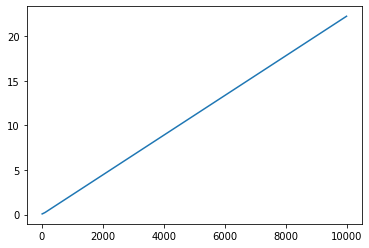

In [6]:
# Task A2: perform for b = 10, 100, 1000, 10000

b = [10, 100, 1000, 10000]
I = []

for upper in b:
    I += [trapezium(0, upper, 5)]
print(I)

# plot I vs b
plt.plot(b, I)

0.02225521737361166 [0.0222552  0.02224971 0.02210898 0.02087286 0.01642505 0.01030174
 0.00599061 0.00357255 0.0022337  0.0014613  0.00099402 0.00069885
 0.00050527 0.00037417 0.00028287 0.00021775 0.00017029 0.00013506
 0.00010847] 8.810419690010872e-05
0.02225521737361166 [2.22551974e-02 2.22497080e-02 2.21089766e-02 2.08728587e-02
 1.64250495e-02 1.03017386e-02 5.99061172e-03 3.57254561e-03
 2.23369928e-03 1.46129673e-03 9.94021248e-04 6.98847563e-04
 5.05271011e-04 3.74167498e-04 2.82872998e-04 2.17745563e-04
 1.70291724e-04 1.35063695e-04 1.08473992e-04 8.81041969e-05
 7.22894801e-05 5.98619818e-05 4.99883914e-05 4.20648429e-05
 3.56475215e-05 3.04060007e-05 2.60913332e-05 2.25138928e-05
 1.95277670e-05 1.70196184e-05 1.49006381e-05 1.31006666e-05
 1.15638526e-05 1.02454155e-05 9.10920920e-06 8.12587174e-06
 7.27140975e-06 6.52610609e-06 5.87367126e-06 5.30057953e-06
 4.79554624e-06 4.34911360e-06 3.95332062e-06 3.60143867e-06
 3.28775831e-06 3.00741680e-06 2.75625767e-06 2.53071

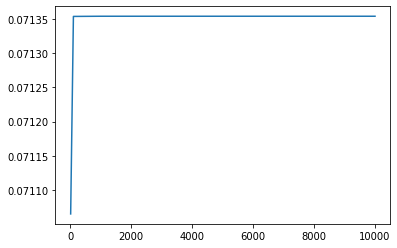

In [7]:
# Task A3: input of spacing h
b = [10, 100, 1000, 10000]
I = []
h = 0.5

for upper in b:
    I += [trapezium(0, upper, upper/h)]
print(I[3])

# plot I vs b
plt.plot(b, I)

### Task B: Numerical integration of diverging improper integrals

In [8]:
# use the same code as A2 and A3 but change the function
# we see that the function diverges to infinity

### Task C: Trapezium rule for functions with non-equidistant nodes

In [9]:
# we will then compute the integral with the given spacing of the provided x list

In [10]:
def trapz(xn, yn):
    S = 0
    
    # compute the area of a given trapezium with its given boundaries
    for i in range(0, len(xn)-1):
        S += 0.5*(yn[i+1] + yn[i])*(xn[i+1] + xn[i])
    return S

In [13]:
# test the function
xn = np.array([1, 5, 12, 14, 15])
yn = f(xn)
trapz(xn, yn)

0.0853243469024004

### Task D: Visualising River Thames Basin in London

North Bank: xn.txt and yn.txt \
South Bank: xs.txt and ys.txt

In [20]:
# Reading the files

# xn
xn = []
with open('xn.txt') as f_xn:
    for x in f_xn:
        x_strip = x.rstrip('\n')
        xn += [float(x_strip)]
#print(xn)

# yn
yn = []
with open('yn.txt') as f_yn:
    for y in f_yn:
        y_strip = y.rstrip('\n')
        yn += [float(y_strip)]
#print(yn)

# xs
xs = []
with open('xs.txt') as f_xs:
    for x in f_xs:
        x_strip = x.rstrip('\n')
        xs += [float(x_strip)]
#print(xs)

# ys
ys = []
with open('ys.txt') as f_ys:
    for y in f_ys:
        y_strip = y.rstrip('\n')
        ys += [float(y_strip)]
#print(ys)

(-1657.4516500000002, 34375.87865, 246.33999999999997, 6240.46)

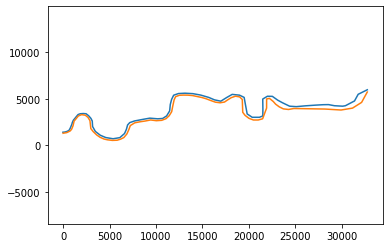

In [22]:
# plot the curves of the two banks
plt.plot(xn,yn,xs,ys)
plt.axis('equal')

In [24]:
# compute the area of the river from given data
Area = trapz(xn,yn) - trapz(xs,ys)
print(Area*1.0e-6)

663.4634012823963


### Clinic Tutorial: Double Integral

1. Take the inner integral of function z and integrate with respect to y 
2. Take the resulting integral G and integrate it with respect to x

In [27]:
# Set the x and y arrays
x = np.arange(2, 4+0.01, 0.01)
y = np.arange(2, 5+0.01, 0.01)

#integrate along y first for all points of x
#need an array to store these integrals

G = np.ndarray(len(x))
for i in range(0, len(x)):
    # compute z function along y for given x[i]
    z = (x[i] - 2)**2 + (y - 3)
    
    # integrate
    G[i] = trapz(y, z)

#now integrate all G(x) along x in range [2,4]
I = trapz(x, G)
print(I)

5720021.999999633
